# Machine Learning and Statistics Project 2019

In [25]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt


from matplotlib.pyplot import suptitle
from matplotlib import rcParams
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Nicely formatted plots
%matplotlib inline

# Load the Boston housing dataset from sklearn
from sklearn.datasets import load_boston
bhp = load_boston()
prices = bhp.target # Define the target values
features = bhp.data # Define the attribute values

#Store in DataFrame - Easier manipulation
attributes = bhp.feature_names # feature name(s)
data    = pd.DataFrame(features, columns = attributes)
target  = pd.DataFrame(prices, columns =['MEDV'])
boston  = pd.concat([data, target,], axis = 1) #concat data/target


## Explore the Data

In [2]:
# Key things to note is data, target, feature_names as I will use these during the project
print(bhp)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [3]:
# Above I executed bhp to have a look but it it not the best for reading. Below contains the similar information but is 
# structured. ie : Attribute Information and what is represents

print (bhp.DESCR)

print ("---------------------------------------------")
print ("Summary\n")
features = boston.shape[1]
houses = boston.shape[0]
print ("Number of Houses          : ", houses)
print ("Number of Housing Features: ", features)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Take a look at the data. I have specified three rows. If this is left empty the default will be five rows
print(boston.head(3))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  


In [5]:
# Statistical details of each column - Using print keep the information on the same page and no scrolling is required.
print(boston.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [6]:
# Null value check
print(boston.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


## Statistical Analysis

By using the NumPy library I am able to calculate a few meaningful statistics about the dataset

In [7]:
# Number of houses
total_houses = data.shape[0]

# Number of features
total_features = data.shape[1]

# Max price
max_price = np.amax(prices)

# Minimum price
min_price = np.min(prices)

# Mean price
mean_price = np.mean(prices)

# Median price
median_price = np.median(prices)

# Standard deviation
std_dev = np.std(prices)

# Calculate and show statistics
print ("House prices in $1000's\n")
print ("Total houses       :", total_houses)
print ("Total features     :", total_features)
print ("Minimum price      : ${:.0f}".format(min_price))
print ("Maximum price      : ${:.0f}".format(max_price))
print ("Mean price         : ${:.2f}".format(mean_price))
print ("Median price       : ${:.2f}".format(median_price))
print ("Standard deviation : ${:.2f}".format(std_dev))

House prices in $1000's

Total houses       : 506
Total features     : 13
Minimum price      : $5
Maximum price      : $50
Mean price         : $22.53
Median price       : $21.20
Standard deviation : $9.19


Total number of houses along the river is =  35 , and the median price along the river in $1000's : $23.30 

Total number of houses not along the river is =  471 , and the median price not along the river in $1000's : $20.90 



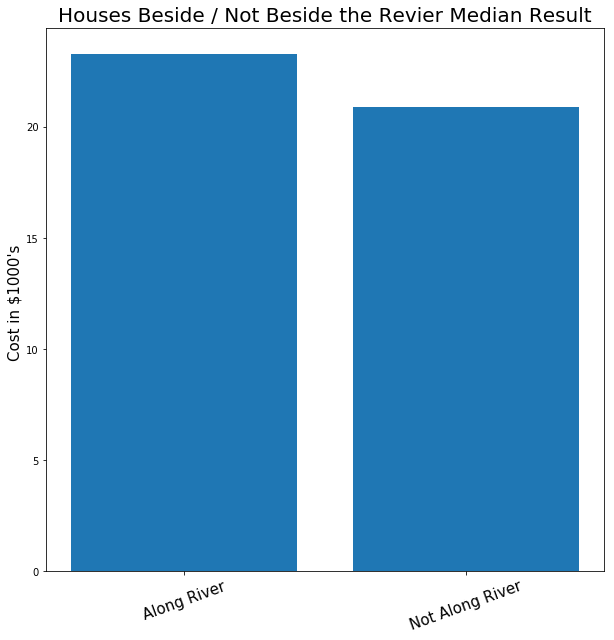

In [29]:
# Find total of houses that are along the Charles river and those that aren’t.

# Find houses either along or not along the river
chas1=boston[boston['CHAS']==1]['MEDV']
chas0=boston[boston['CHAS']==0]['MEDV']

# Find the total number of house along the charles river
check1 = (boston.CHAS == 1).sum()

# Find the median of MEDV where CHAS == 1
medianMEDV1 = (boston.loc[boston["CHAS"] == 1]["MEDV"]).median()
print ("Total number of houses along the river is = ",(check1), ", and the median price along the river in $1000's : ${0:.2f}".format(medianMEDV1), "\n")






# Find the total number of house not along the charles river
check0 = (boston.CHAS != 1).sum()

# find and print the locations where CHAS = 0. Will edit this out for viewing reason 
check = (boston.loc[boston['CHAS'] != 1])
#print("Position numbers of these 0.0 results are : \n",(check.CHAS))

# Find the median of MEDV where CHAS == 0
medianMEDV0 = (boston.loc[boston["CHAS"] != 1]["MEDV"]).median()
print ("Total number of houses not along the river is = ",(check0), ", and the median price not along the river in $1000's : ${0:.2f}".format(medianMEDV0),"\n")

# Generate a bar graph
names = ['Along River', 'Not Along River'] # Add X details
values = [medianMEDV1 , medianMEDV0]       # Use values store in median result
index = np.arange(len(names))
plt.figure(figsize=(10, 10))
plt.title("Houses Beside / Not Beside the Revier Median Result", fontsize=20)
plt.xticks(index, names, fontsize=15, rotation=20)
plt.ylabel("Cost in $1000's ", fontsize=15)
plt.bar(names, values)    
plt.show()

In [39]:
# Generate Ttest based on if house is beside or not beside the river and MEDV
print(ss.ttest_ind(chas1, chas0))

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)


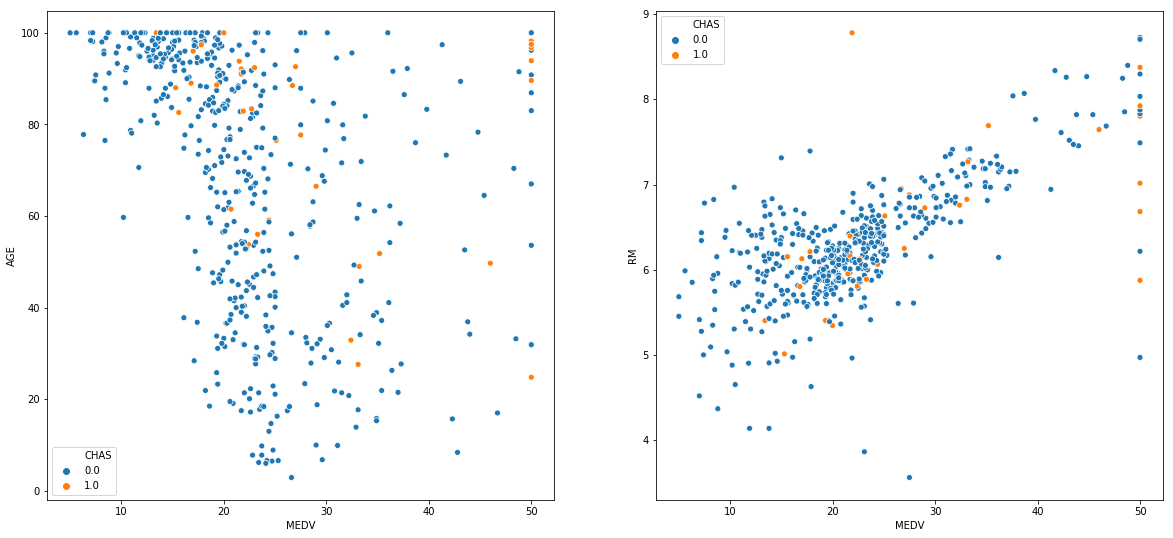

In [73]:
# ScatterPlot
colours = ["blue", "red"] # Define Plot Colours 
f, axes = plt.subplots(1, 2) # Allow me to generate graphs side by side
rcParams['figure.figsize'] = 20,9 # Set display size

# Do houses along and not along the river depend on age
sns.scatterplot(data=boston,x='MEDV',y='AGE', hue='CHAS', ax=axes[0])

# Do houses along and not along the river depend on room size
sns.scatterplot(data=boston,x='MEDV',y='RM', hue='CHAS', ax=axes[1])
plt.show()


A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables. These dots are plotted along the x-axis and y-axis. We use scatter plots when we want to reveal an association between two variables.

Above I have two scatterplots side by side. The first displays AGE along the y axis and MEDV _(Median value of owner-occupied homes in $1000's)_ along the x axis, the HUE that I have used is chas _(Charles River dummy variable (= 1 if tract bounds river; 0 otherwise))_. From this I am looking to see if age has any factor where people live or dont live beside the river. We can notice that the age factor with people living beside the river 

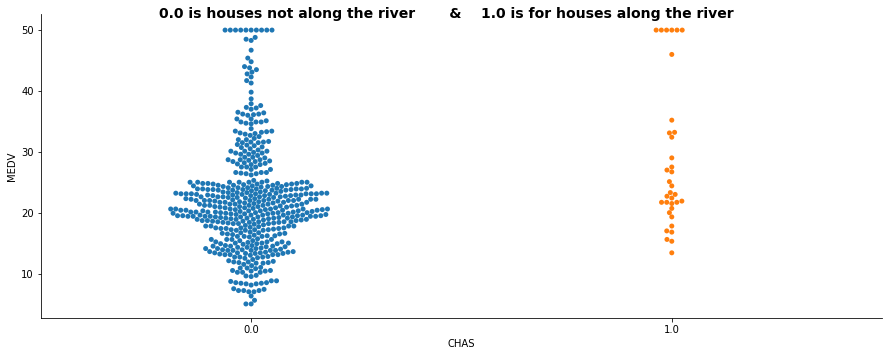

In [12]:
# Lets view the amount of houses that are either beside or not beside the river
colours = ["blue", "red"] # Define Plot Colours 

# Add kind. height and aspect to position accross the page
sns.catplot(x="CHAS", y="MEDV", data=boston, kind="swarm", height=5, aspect=2.5)
suptitle('0.0 is houses not along the river       &    1.0 is for houses along the river', fontsize=14, fontweight='bold')
plt.show()

In [173]:
# Load everything into the one data frame

x=pd.DataFrame(bhp.data, columns=bhp.feature_names)
y=pd.DataFrame(bhp.target)

# Show what is in x
print(x.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [174]:
# Apply regression using sklearn
reg=linear_model.LinearRegression()

# Split the data into training and testing data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =4) # Pass dataframe to split

print(reg.fit(x_train, y_train))
print("\n")

# 13 Weights, 1 for each coefficient as this is linear regression
print(reg.coef_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


[[-1.15966452e-01  4.71249231e-02  8.25980146e-03  3.23404531e+00
  -1.66865890e+01  3.88410651e+00 -1.08974442e-02 -1.54129540e+00
   2.93208309e-01 -1.34059383e-02 -9.06296429e-01  8.80823439e-03
  -4.57723846e-01]]


In [175]:
# Print the intercept and number of coefficients.

# Predict 
a=reg.predict(x_test)
# print(a)  This will pint a long list but I will only use one so 
print("x_test \n ", (a[3]), "\n")

# As we can see from print(a[0]) above the number is 12.07. Below we can compare with the actual value that is 16.5
# The predictions should always be faily close
print("y_test ", y_test[3:4])

x_test 
  [18.15584511] 

y_test          0
211  19.3


In [176]:
# Print the intercept and number of coefficients
print(" Estimated intercept", reg.intercept_)

print(" Number of coefficients", len(reg.coef_[0]))

 Estimated intercept [35.55487454]
 Number of coefficients 13


In [177]:
# Construct a data frame that contains features and estimated coefficients

print(pd.DataFrame(zip(x.columns, reg.coef_[0]), columns = ["Features", "EstimatedCoefficients"]))

   Features  EstimatedCoefficients
0      CRIM              -0.115966
1        ZN               0.047125
2     INDUS               0.008260
3      CHAS               3.234045
4       NOX             -16.686589
5        RM               3.884107
6       AGE              -0.010897
7       DIS              -1.541295
8       RAD               0.293208
9       TAX              -0.013406
10  PTRATIO              -0.906296
11        B               0.008808
12    LSTAT              -0.457724


_From the data frame above I can see that there is a high correlation between RM and prices._

_I will use a scatter plot to view this relationship better._

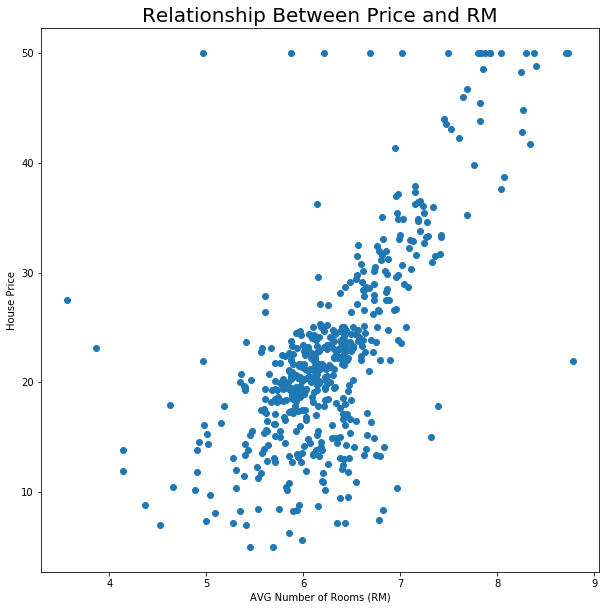

In [178]:
# Plot the scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(boston.RM, prices)
plt.title(("Relationship Between Price and RM"),fontsize=20)
plt.xlabel("AVG Number of Rooms (RM)")
plt.ylabel("House Price")
plt.show()


_We can see that there is a positive correlation between RM and housing prices_

In [20]:
# Mean square error. a-y_test will give me the error and **2 will give me the mean square error.

print(np.mean((a-y_test)**2))

0    25.419587
dtype: float64


## Predict